# Evolutionary Optimisation project

# Basic Scenario

## 1. Write a function that calculates the distance between two words of equal length.

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt

def distances(str1, str2):
    dist = 0

    for i in range(len(str1)):
        if str1[i] != str2[i]:
            dist = dist+1
            
    return dist

The function defined in the above cell is the Hamming distance which counts the number of differences between strings

In [9]:
distances('1111','0000')

4

## 2. Initialisation

### 2.1 Use the first two lines of the Shakespeare sonnet number corresponding to the last two digits of your student number as a ‘master sequence’ 

The last two digits of my Student Number is '24' therefore, the first 2 lines of Shakespeare's 24th sonnet will be used for initialisation

In [10]:
master_sequence = "mine eye hath playd the painter and hath stelld, thy beautys form in table of my heart"

def mast_dist(string1):
    dist = 0
    
    for i in range(len(master_sequence)):
        if string1[i] != master_sequence[i]:
            dist = dist+1
            
    return dist

### 2.2 Generate N random sequences of length L in the letters of the alphabet (e.g. N=10)

In [14]:
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', ',']
# alphabet accounts for ' ' and ','

rand_sequence_list = []
parent = "mine eye hath playd the painter and hath stelld, thy beautys form in table of my heart"
print(len(parent))
prob = 0.1
N = 10

for i in range(N):
    rand_seq = ''
    for character in parent:
        if random.random()>prob:
            rand_seq = rand_seq + character
        else:
            rand_seq = rand_seq + random.choice(alphabet)
    rand_sequence_list.append(rand_seq)
    print(rand_seq, mast_dist(rand_seq))
    

86
mine eye hath pcayd ,he painter and gath htelld, thy beautys gorm in table of my henrt 6
 ine eyn hath playd the painter and hath stelld,tthy begutyscform in tabge of my heart 6
mineueje hath playd the paintorhznd hpth stelld, thy beautys form in table of py heart 7
mine eye hath glayd the painber abd hathostellm, thy beavtts form in table of my heard 8
mine eye rath playd the bainter agx hath stelld, thy beautys qormpin table of uyqheart 8
qine eyekhath playd bme painter nnd hath stelld, lhy beautys form ip table nf my heart 8
mins eye waep playd tae iainxer and hath stelldt thy beautys form in tbblo oc mynzeabx 15
mineeeye hath playd the painter anx hath stelld, thysbeautys form in table oftmy hegrt 5
mine ey, hathzplayd thk painter and haty stelld, thy ,eautysnform in table oz my heart 7
mineoeye hath plryd she pacnter and hath srelli, thy beauty, form in tyble ofzmy heart 9


### 2.3 - Select that sequence out of the N sequences that you have just generated, which has the smallest distance to the ‘master sequence’ you picked above

In [15]:
smallest = min(mast_dist(x) for x in rand_sequence_list)
print(smallest)


for i in rand_sequence_list:
    if mast_dist(i) == smallest:
        initialiser = i

print(initialiser)


5
mineeeye hath playd the painter anx hath stelld, thysbeautys form in table oftmy hegrt


## 3. Evolution

## Make N error-prone copies (‘offspring’) of this sequence: that is, with a probability, each letter in this sequence can randomly change to another letter of the alphabet (mutation) in this copying process

## - If any offspring has a smaller distance to the master sequence select the one with the smallest distance and use that to create a new generation of offspring, otherwise use the previous one again.


45 ynllhshkjnqiunvwiwrcvzykm fodhebidxv dquaojjrigyc,teudp,qebkccdxpqxrdfhcynqgnvlfv,wquq 86


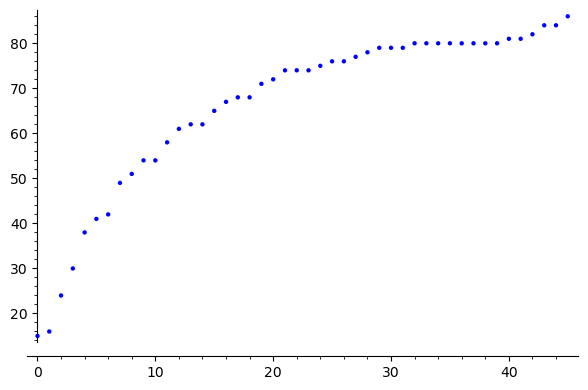

In [16]:
parent = initialiser

dist_list = []

gens = 150
prob = 0.1

for gen in range(gens):
    child = ''
    for character in parent:
        if random.random()>prob:
            child = child + character
        else:
            child = child + random.choice(alphabet)
    if mast_dist(parent) < mast_dist(child): # ensures the corruption process only gets worse
        parent = child
    dist_list.append([gen, mast_dist(parent)])
    if mast_dist(parent) == len(parent): # stops the corruption process once maximum corruption reached
        corrupted_string = parent
        print(gen, parent, mast_dist(parent))
        break

point(dist_list)



We can see that the corruption of the string is very effective at the beginning of the corruption process. This is because early in the corruption process, nearly all characters of the initialising string are susceptible to becoming corrupted. As more characters of the string become corrupted over generations, the ability to corrupt the remaining uncorrupted characters becomes increasingly difficult. This can be seen by the plot becoming shallower in later generations.

## 4. Termination - Repeat the process for a number of G generations till you have achieved the master sequence through evolution.

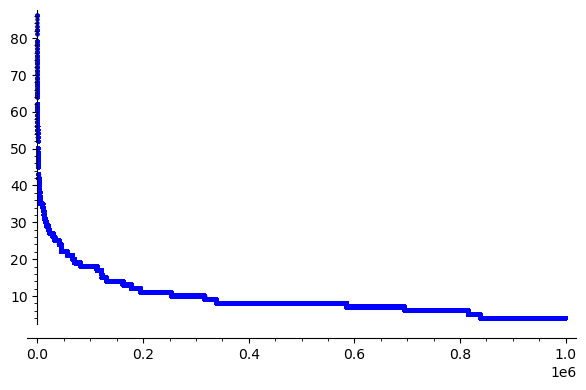

In [17]:
dist_list = []

parent = corrupted_string

gens = 1000000
prob = 0.1

for gen in range(gens):
    child = ''
    for character in parent:
        if random.random()>prob:
            child = child + character
        else:
            child = child + random.choice(alphabet)
    if mast_dist(parent) > mast_dist(child): # ensures that corrupted string only gets better
        parent = child
    dist_list.append([gen, mast_dist(parent)])
    if mast_dist(parent) == 0: # stops the optimisation process once master string is reached
        print(gen, parent, mast_dist(parent))
        break
        
point(dist_list)

The above code has now become an optimisation algorithm going in the direction of decreasing hamming distance

We can see that the optimisation of the corrupted string is very effective at the beginning of the optimisation process. This is because early in the optimisation process, nearly all characters of the corrupted string are susceptible to becoming optimised to the master string. As more characters of the string become optimised over generations, the ability to optimise the remaining corrupted characters becomes increasingly difficult. This can be seen by the plot becoming shallower in later generations.

In [18]:
print(gen, parent, mast_dist(parent))

999999 mine eye haxh playd the qa,nter and hath stellg, thy beautys form in table of my heart 4


We can see that despite running the optimisation process for 1 million generations, the offspring do not converge to the master sequence. As with the corruption process, optimisation 

# Advanced Scenario

## 1. Investigate how many generations G it typically takes to reach this master sequence

As seen in the basic scenario, the optimisation solution did not converge to the master string despite running for 1 million generations. Therefore, we will investigate the effect of different parameters such as string length, probability and the alphabet on the number of generations needed to converge to the master sequence.

### 1.1 Effect of string length

In [51]:
master_sequence = "mine eye hath playd"

def mast_dist(string1):
    dist = 0
    
    for i in range(len(master_sequence)):
        if string1[i] != master_sequence[i]:
            dist = dist+1
            
    return dist

In [52]:
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', ',']
# alphabet accounts for ' ' and ','

rand_sequence_list = []
parent = "mine eye hath playd"
print(len(parent))
prob = 0.1
N = 10

for i in range(N):
    rand_seq = ''
    for character in parent:
        if random.random()>prob:
            rand_seq = rand_seq + character
        else:
            rand_seq = rand_seq + random.choice(alphabet)
    rand_sequence_list.append(rand_seq)
    print(rand_seq, mast_dist(rand_seq))

19
oine eyk hathrpiayd 4
mine eyezhath prayd 2
mine eye hath playd 0
mine eye hath playd 0
mise eye uath glayt 4
yinudeye hath playd 3
mine fye hath playd 1
mine eye hash playd 1
mine eye hath playd 0
mine eye hatl,playd 2


In [53]:
smallest = min(mast_dist(x) for x in rand_sequence_list)
print(smallest)


for i in rand_sequence_list:
    if mast_dist(i) == smallest:
        initialiser = i

print(initialiser)

0
mine eye hath playd


46 iagawmtqbugnioxuxke 19


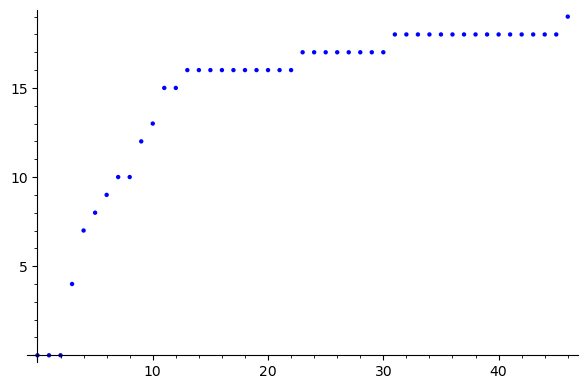

In [54]:
parent = initialiser

dist_list = []

gens = 150
prob = 0.1

for gen in range(gens):
    child = ''
    for character in parent:
        if random.random()>prob:
            child = child + character
        else:
            child = child + random.choice(alphabet)
    if mast_dist(parent) < mast_dist(child): # ensures the corruption process only gets worse
        parent = child
    dist_list.append([gen, mast_dist(parent)])
    if mast_dist(parent) == len(parent): # stops the corruption process once maximum corruption reached
        corrupted_string = parent
        print(gen, parent, mast_dist(parent))
        break

point(dist_list)

In [55]:
dist_list = []

parent = corrupted_string

gens = 1000000
prob = 0.1

number_of_runs = 50

generation_list = []

for i in range(number_of_runs):
    parent = corrupted_string
    for gen in range(gens):
        child = ''
        for character in parent:
            if random.random()>prob:
                child = child + character
            else:
                child = child + random.choice(alphabet)
        if mast_dist(parent) > mast_dist(child):
            parent = child
        #dist_list.append([gen, mast_dist(parent)])
        if mast_dist(parent) == 0:
            generation_list.append(gen)
            #print(gen, parent, mast_dist(parent))
            break

print(generation_list)
#point(dist_list)


[2180, 3091, 4653, 5760, 2707, 1760, 5473, 6236, 2328, 7259, 2857, 2766, 7019, 5562, 6040, 4848, 5139, 2117, 7190, 3793, 2797, 2730, 5223, 2782, 4470, 1860, 4617, 1958, 2885, 6157, 4165, 2441, 11590, 1791, 3804, 2489, 4628, 2366, 3518, 3780, 3541, 2900, 4109, 3587, 4244, 2573, 2592, 2710, 3072, 5225]


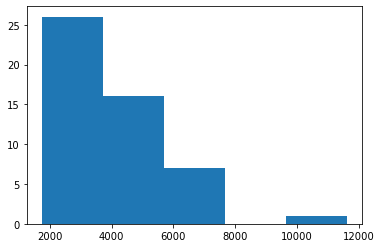

In [56]:
plt.hist(generation_list, bins = 5)
plt.show()

Shortening the length of the string has significantly reduced the number of generations needed to reach the master string. It can be concluded that the shorter the length of the string, the less time needed to converge to the master string.

With a probbility of 0.1, the vast majority of runs reaching the master sequence approximately between 2000 and 8000 generations

### 1.2 Effect of probability

In [57]:
dist_list = []

parent = corrupted_string

gens = 1000000
prob = 0.05

number_of_runs = 50

generation_list = []

for i in range(number_of_runs):
    parent = corrupted_string
    for gen in range(gens):
        child = ''
        for character in parent:
            if random.random()>prob:
                child = child + character
            else:
                child = child + random.choice(alphabet)
        if mast_dist(parent) > mast_dist(child):
            parent = child
        #dist_list.append([gen, mast_dist(parent)])
        if mast_dist(parent) == 0:
            generation_list.append(gen)
            #print(gen, parent, mast_dist(parent))
            break

print(generation_list)
#point(dist_list)


[3848, 4070, 5992, 4941, 2639, 2849, 10782, 2822, 3618, 3434, 4547, 2925, 3793, 4070, 5449, 3570, 3930, 4247, 1804, 4184, 2489, 4100, 3850, 4170, 6251, 4671, 4527, 3701, 2453, 3497, 2651, 2776, 4424, 5222, 2048, 5599, 1956, 7360, 3439, 2702, 2720, 4878, 2344, 2269, 4418, 6689, 2582, 3515, 2729, 1743]


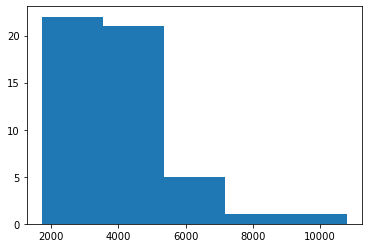

In [58]:
plt.hist(generation_list, bins = 5)
plt.show()

Halving the probability from 0.1 to 0.05 appears to have the effect of causing the number of generations to reach the master sequence to be reached quicker with the vast majority of runs reaching the master sequence approximately between 2000 and 7000 generations

In [60]:
dist_list = []

parent = corrupted_string

gens = 1000000
prob = 0.2

number_of_runs = 50

generation_list = []

for i in range(number_of_runs):
    parent = corrupted_string
    for gen in range(gens):
        child = ''
        for character in parent:
            if random.random()>prob:
                child = child + character
            else:
                child = child + random.choice(alphabet)
        if mast_dist(parent) > mast_dist(child):
            parent = child
        #dist_list.append([gen, mast_dist(parent)])
        if mast_dist(parent) == 0:
            generation_list.append(gen)
            #print(gen, parent, mast_dist(parent))
            break

print(generation_list)
#point(dist_list)

[14536, 12754, 35843, 8523, 16906, 6316, 18728, 15310, 6252, 11162, 13807, 12196, 17990, 12206, 21709, 8401, 8326, 8524, 16719, 6574, 10210, 23988, 6335, 11022, 18288, 14737, 12475, 7492, 13137, 4870, 27619, 11535, 23520, 12634, 11248, 16008, 9673, 4858, 19988, 9941, 7392, 14341, 9261, 12244, 4838, 5472, 9745, 7813, 15159, 18789]


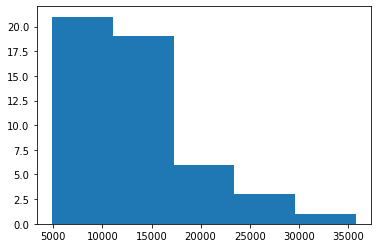

In [61]:
plt.hist(generation_list, bins = 5)
plt.show()

Doubling the probability from 0.1 to 0.2 appears to have the effect of causing the number of generations to reach the master sequence to be reached after more generations with the vast majority of runs reaching the master sequence approximately between 5000 and 17000 generations

### 1.3 Effect of alphabet

In [63]:
alphabet = ['a', 'd', 'e', 'h', 'i', 'l', 'm', 'n', 'p', 't', 'y', ' ']

dist_list = []

parent = corrupted_string

gens = 1000000
prob = 0.1

number_of_runs = 50

generation_list = []

for i in range(number_of_runs):
    parent = corrupted_string
    for gen in range(gens):
        child = ''
        for character in parent:
            if random.random()>prob:
                child = child + character
            else:
                child = child + random.choice(alphabet)
        if mast_dist(parent) > mast_dist(child):
            parent = child
        #dist_list.append([gen, mast_dist(parent)])
        if mast_dist(parent) == 0:
            generation_list.append(gen)
            #print(gen, parent, mast_dist(parent))
            break

print(generation_list)
#point(dist_list)


[1602, 2030, 1098, 1167, 1229, 1098, 1481, 1036, 1074, 3210, 1684, 1526, 1189, 1856, 1528, 2517, 1088, 1191, 1045, 820, 1163, 1329, 3679, 1501, 2448, 1235, 1375, 567, 1321, 1640, 1733, 728, 1693, 1196, 1674, 668, 1222, 995, 3013, 2186, 1949, 870, 1128, 1287, 2453, 1487, 1088, 2011, 804, 2125]


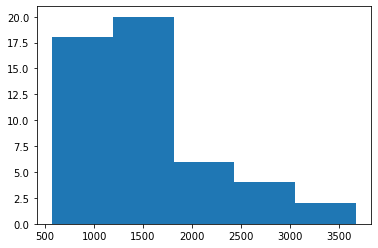

In [64]:
plt.hist(generation_list, bins = 5)
plt.show()

The alphabet now only includes the characters that are part of the master string and the probability has been kept at 0.1. Reducing the characters of the alphabet causes the master sequence to be reached sooner as the vast majority of runs reachi the master sequence approximately between 550 and 1800 generations

### 1.4 Application of evolutionary algorithms in the workplace

- Evaluation of pharmaceutical compunds to create more effective treatments
- Evovle and optimise deep learning archietcture
- Biological system modelling

Cognizant. _Model and prescribe optimal outcomes_. www.cognizant.com. Evolutionary AI | Cognizant. [online] Available at: https://www.cognizant.com/us/en/ai/evolutionary-ai.